# Developing song recommender systems

#### The purpose of this project is to build recommender systems for song recommendation using the following dataset.

#### The first model is based on songs' popularity which is useful for showing trendy music to all, regardless of their personal information and history. The second model is an item-based collaborative filtering which find similiar songs based on common users and recommend them.

#### At the end, models are evaluated and compared based on the precision-recall metric.

In [5]:
import turicreate as tr
import matplotlib.pyplot as plt

# Load a music dataset

In [6]:
song_data = tr.SFrame('~/song_data/')

In [41]:
song_data

user_id,song_id,listen_count,title,artist
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1,The Cove,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1,Stronger,Kanye West
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N'Roll ...,Héroes del Silencio
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1,Paper Gangsta,Lady GaGa
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1,Stacked Actors,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1,Sehr kosmisch,Harmonia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn youreyes ...,Thievery Corporationfeat. Emiliana Torrini ...


In [4]:
type(song_data)

turicreate.data_structures.sframe.SFrame

In [5]:
len(song_data)

1116609

# Number of unique users

In [6]:
users = song_data['user_id'].unique()

In [7]:
len(users)

66346

# Create a song recommender

Although the whole dataset should be used for this model, I use 'train_data' for consistency among models to be able to compare them.

In [7]:
train_data,test_data = song_data.random_split(.8,seed=0)

## Model 1: simple popularity-based recommender

Suitable for showing trends, or when there is no personal hsitory


In [9]:
popularity_model = tr.popularity_recommender.create(train_data,
                                                           user_id = 'user_id',
                                                           item_id = 'song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 1.32793s

893580 observations to process; with 9952 unique items.

### Make a prediction using model 1

The result will be the same for every single user because the model is only based on popular songs

In [10]:
popularity_model.recommend(users=[users[0]])

user_id,song,score,rank
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Sehr kosmisch - Harmonia,4754.0,1
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Undo - Björk,4227.0,2
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,You're The One - DwightYoakam ...,3781.0,3
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Revelry - Kings Of Leon,3527.0,5
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Secrets - OneRepublic,3148.0,7
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Fireflies - CharttraxxKaraoke ...,2532.0,8
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Tive Sim - Cartola,2521.0,9
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Drop The World - LilWayne / Eminem ...,2053.0,10


In [58]:
popularity_model.recommend(users=[users[1]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sehr kosmisch - Harmonia,4754.0,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Undo - Björk,4227.0,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,You're The One - DwightYoakam ...,3781.0,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Revelry - Kings Of Leon,3527.0,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Secrets - OneRepublic,3148.0,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Hey_ Soul Sister - Train,2538.0,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Fireflies - CharttraxxKaraoke ...,2532.0,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Tive Sim - Cartola,2521.0,10


# Personalized recommender


## Model 2: Item-based collaborative filtering

This model uses item-item similarities based on
users in common.

In [18]:
personalized_model = tr.item_similarity_recommender.create(train_data,
                                                                  user_id = 'user_id',
                                                                  item_id = 'song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 1.78379s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.155ms                        | 1.5        |

| 65.746ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 279.894ms                           | 0                | 0               |

| 1.71s                               | 100              | 9952            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.80821s

## Make song recommendations

In [19]:
personalized_model.recommend(users=[users[0]])

user_id,song,score,rank
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Cuando Pase El Temblor -Soda Stereo ...,0.019450453611520622,1
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Fireflies - CharttraxxKaraoke ...,0.014473731701190654,2
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Love Is A Losing Game -Amy Winehouse ...,0.014286596041459303,3
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Marry Me - Train,0.014133471709031325,4
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Secrets - OneRepublic,0.013591665488023024,5
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Sehr kosmisch - Harmonia,0.013398789442502536,6
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Te Hacen Falta Vitaminas- Soda Stereo ...,0.01293028317964994,7
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,OMG - Usher featuringwill.i.am ...,0.012777828253232516,8
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Y solo se me ocurreamarte (Unplugged) - ...,0.012341127945826603,9
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,No Dejes Que... -Caifanes ...,0.012104249917543851,10


In [20]:
personalized_model.recommend(users=[users[1]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Riot In Cell Block NumberNine - Dr Feelgood ...,0.03749999403953552,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sei Lá Mangueira -Elizeth Cardoso ...,0.03316326439380646,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,The Stallion - Ween,0.032258063554763794,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Rain - Subhumans,0.031415924429893494,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,West One (Shine On Me) -The Ruts ...,0.030677199363708496,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Back Against The Wall -Cage The Elephant ...,0.030120477080345154,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Life Less Frightening -Rise Against ...,0.0284431129693985,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,A Beggar On A Beach OfGold - Mike And The ...,0.023002490401268005,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Audience Of One - RiseAgainst ...,0.01939384639263153,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Blame It On The Boogie -The Jacksons ...,0.018987342715263367,10


# Find similar songs in the data set

 based on users in common

In [21]:
personalized_model.get_similar_items(['Rain - Subhumans'])

song,similar,score,rank
Rain - Subhumans,West One (Shine On Me) -The Ruts ...,0.17964690923690796,1
Rain - Subhumans,Knocking On ForbiddenDoors - Enigma ...,0.12566369771957397,2
Rain - Subhumans,A Beggar On A Beach OfGold - Mike And The ...,0.07939916849136353,3
Rain - Subhumans,Who Can Compare - FoolishThings ...,0.04558968544006348,4
Rain - Subhumans,Like Herod - Mogwai,0.026385247707366943,5
Rain - Subhumans,Found Home - 59 Times thePain ...,0.024590134620666504,6
Rain - Subhumans,Behind The Sea [Live InChicago] - Panic At The ...,0.02068251371383667,7
Rain - Subhumans,Café Del Mar - Energy 52,0.01871103048324585,8
Rain - Subhumans,My Shepherd (Psalms 23)(featuring Kurt Carr & ...,0.017031610012054443,9
Rain - Subhumans,Robot Soul (Radio Edit) -Cosmo Vitelli ...,0.016966044902801514,10


# Compare models' performance
We now formally compare the popularity and the personalized models using precision-recall curves. 

In [59]:

model_performance = tr.recommender.util.compare_models(test_data,
                                                               [popularity_model,
                                                                personalized_model])

PROGRESS: Evaluate model M0


recommendations finished on 1000/58628 queries. users per second: 10529.6

recommendations finished on 2000/58628 queries. users per second: 11636.8

recommendations finished on 3000/58628 queries. users per second: 12072.1

recommendations finished on 4000/58628 queries. users per second: 11851

recommendations finished on 5000/58628 queries. users per second: 12065.3

recommendations finished on 6000/58628 queries. users per second: 12177.6

recommendations finished on 7000/58628 queries. users per second: 12405.6

recommendations finished on 8000/58628 queries. users per second: 12466

recommendations finished on 9000/58628 queries. users per second: 12474

recommendations finished on 10000/58628 queries. users per second: 12561.6

recommendations finished on 11000/58628 queries. users per second: 12494.7

recommendations finished on 12000/58628 queries. users per second: 12337.2

recommendations finished on 13000/58628 queries. users per second: 12199.7

recommendations finished on 14000/58628 queries. users per second: 12298.4

recommendations finished on 15000/58628 queries. users per second: 12360.3

recommendations finished on 16000/58628 queries. users per second: 12441.7

recommendations finished on 17000/58628 queries. users per second: 12464.1

recommendations finished on 18000/58628 queries. users per second: 12324

recommendations finished on 19000/58628 queries. users per second: 12271.8

recommendations finished on 20000/58628 queries. users per second: 12275.9

recommendations finished on 21000/58628 queries. users per second: 12331.6

recommendations finished on 22000/58628 queries. users per second: 12247.3

recommendations finished on 23000/58628 queries. users per second: 12132.6

recommendations finished on 24000/58628 queries. users per second: 12170.3

recommendations finished on 25000/58628 queries. users per second: 12137.7

recommendations finished on 26000/58628 queries. users per second: 12192.1

recommendations finished on 27000/58628 queries. users per second: 12163.9

recommendations finished on 28000/58628 queries. users per second: 11983.9

recommendations finished on 29000/58628 queries. users per second: 11842.5

recommendations finished on 30000/58628 queries. users per second: 11764.6

recommendations finished on 31000/58628 queries. users per second: 11655.8

recommendations finished on 32000/58628 queries. users per second: 11621

recommendations finished on 33000/58628 queries. users per second: 11487.2

recommendations finished on 34000/58628 queries. users per second: 11373.1

recommendations finished on 35000/58628 queries. users per second: 11334.1

recommendations finished on 36000/58628 queries. users per second: 11258.6

recommendations finished on 37000/58628 queries. users per second: 11210

recommendations finished on 38000/58628 queries. users per second: 10965.8

recommendations finished on 39000/58628 queries. users per second: 10921.7

recommendations finished on 40000/58628 queries. users per second: 10985.6

recommendations finished on 41000/58628 queries. users per second: 11046.6

recommendations finished on 42000/58628 queries. users per second: 11083.3

recommendations finished on 43000/58628 queries. users per second: 11144.5

recommendations finished on 44000/58628 queries. users per second: 11054.4

recommendations finished on 45000/58628 queries. users per second: 10952

recommendations finished on 46000/58628 queries. users per second: 10869.4

recommendations finished on 47000/58628 queries. users per second: 10809.1

recommendations finished on 48000/58628 queries. users per second: 10717.7

recommendations finished on 49000/58628 queries. users per second: 10622.4

recommendations finished on 50000/58628 queries. users per second: 10622.1

recommendations finished on 51000/58628 queries. users per second: 10591.4

recommendations finished on 52000/58628 queries. users per second: 10521.9

recommendations finished on 53000/58628 queries. users per second: 10495.6

recommendations finished on 54000/58628 queries. users per second: 10435.1

recommendations finished on 55000/58628 queries. users per second: 10446

recommendations finished on 56000/58628 queries. users per second: 10488.6

recommendations finished on 57000/58628 queries. users per second: 10508.6

recommendations finished on 58000/58628 queries. users per second: 10514.7


Precision and recall summary statistics by cutoff


+--------+----------------------+-----------------------+
| cutoff |    mean_precision    |      mean_recall      |
+--------+----------------------+-----------------------+
|   1    | 0.028331172818448522 | 0.0074922204452889316 |
|   2    | 0.02722248754861159  |  0.014795267425410083 |
|   3    | 0.024783379954970135 |  0.019985345559090307 |
|   4    | 0.02300521934911642  |  0.024405713410891525 |
|   5    | 0.021044552091151924 |  0.027760064050806808 |
|   6    | 0.020018876077414562 |  0.03181861488300843  |
|   7    | 0.018923186385831996 |  0.03513253370693226  |
|   8    | 0.018005475199563355 |  0.038211298231166584 |
|   9    |  0.017121132867874   |  0.04081908418010348  |
|   10   | 0.01641024766323333  |   0.0435059606900681  |
+--------+----------------------+-----------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1


recommendations finished on 1000/58628 queries. users per second: 7050.3

recommendations finished on 2000/58628 queries. users per second: 7495.35

recommendations finished on 3000/58628 queries. users per second: 7412.44

recommendations finished on 4000/58628 queries. users per second: 7336.57

recommendations finished on 5000/58628 queries. users per second: 7867.59

recommendations finished on 6000/58628 queries. users per second: 8417.14

recommendations finished on 7000/58628 queries. users per second: 8923.53

recommendations finished on 8000/58628 queries. users per second: 9083.3

recommendations finished on 9000/58628 queries. users per second: 9282.11

recommendations finished on 10000/58628 queries. users per second: 9615.57

recommendations finished on 11000/58628 queries. users per second: 9831.63

recommendations finished on 12000/58628 queries. users per second: 9997.13

recommendations finished on 13000/58628 queries. users per second: 10072.7

recommendations finished on 14000/58628 queries. users per second: 10247.9

recommendations finished on 15000/58628 queries. users per second: 10440.3

recommendations finished on 16000/58628 queries. users per second: 10585.2

recommendations finished on 17000/58628 queries. users per second: 10746.6

recommendations finished on 18000/58628 queries. users per second: 10810.5

recommendations finished on 19000/58628 queries. users per second: 10964.6

recommendations finished on 20000/58628 queries. users per second: 11085.7

recommendations finished on 21000/58628 queries. users per second: 11185.3

recommendations finished on 22000/58628 queries. users per second: 11288.1

recommendations finished on 23000/58628 queries. users per second: 11030.2

recommendations finished on 24000/58628 queries. users per second: 10731.2

recommendations finished on 25000/58628 queries. users per second: 10214

recommendations finished on 26000/58628 queries. users per second: 9792.3

recommendations finished on 27000/58628 queries. users per second: 9757.91

recommendations finished on 28000/58628 queries. users per second: 9824.41

recommendations finished on 29000/58628 queries. users per second: 9912.78

recommendations finished on 30000/58628 queries. users per second: 10006.8

recommendations finished on 31000/58628 queries. users per second: 10095.9

recommendations finished on 32000/58628 queries. users per second: 10181.1

recommendations finished on 33000/58628 queries. users per second: 10269.8

recommendations finished on 34000/58628 queries. users per second: 10300.5

recommendations finished on 35000/58628 queries. users per second: 10351.4

recommendations finished on 36000/58628 queries. users per second: 10393.6

recommendations finished on 37000/58628 queries. users per second: 10447

recommendations finished on 38000/58628 queries. users per second: 10513.3

recommendations finished on 39000/58628 queries. users per second: 10566

recommendations finished on 40000/58628 queries. users per second: 10631.8

recommendations finished on 41000/58628 queries. users per second: 10704.1

recommendations finished on 42000/58628 queries. users per second: 10763.8

recommendations finished on 43000/58628 queries. users per second: 10817.9

recommendations finished on 44000/58628 queries. users per second: 10855.1

recommendations finished on 45000/58628 queries. users per second: 10914

recommendations finished on 46000/58628 queries. users per second: 10946.2

recommendations finished on 47000/58628 queries. users per second: 10941.6

recommendations finished on 48000/58628 queries. users per second: 11000.9

recommendations finished on 49000/58628 queries. users per second: 11043.1

recommendations finished on 50000/58628 queries. users per second: 11080

recommendations finished on 51000/58628 queries. users per second: 11117.3

recommendations finished on 52000/58628 queries. users per second: 11156.8

recommendations finished on 53000/58628 queries. users per second: 11198.8

recommendations finished on 54000/58628 queries. users per second: 11229.1

recommendations finished on 55000/58628 queries. users per second: 11138.1

recommendations finished on 56000/58628 queries. users per second: 10977

recommendations finished on 57000/58628 queries. users per second: 10847.8

recommendations finished on 58000/58628 queries. users per second: 10878.5


Precision and recall summary statistics by cutoff


+--------+---------------------+---------------------+
| cutoff |    mean_precision   |     mean_recall     |
+--------+---------------------+---------------------+
|   1    | 0.19072797980487113 | 0.05956894554773922 |
|   2    | 0.16103227126970004 | 0.09566759011182252 |
|   3    |  0.1404050396852466 |  0.1215003915258181 |
|   4    | 0.12557566350549187 | 0.14265850881581532 |
|   5    | 0.11377157672102044 | 0.15949339137119153 |
|   6    | 0.10439551067749205 |  0.1745289448395203 |
|   7    | 0.09673096229008056 | 0.18777745254558093 |
|   8    | 0.09049856723749747 |  0.2000544756101735 |
|   9    | 0.08516598060843131 |  0.2108351505698548 |
|   10   | 0.08056901139387328 | 0.22070619925809404 |
+--------+---------------------+---------------------+
[10 rows x 3 columns]



# Visualizing the result

## Precision_Recall plot

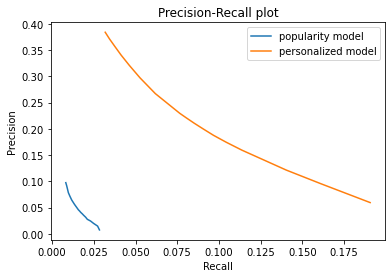

In [61]:
d0=model_performance[0]['precision_recall_overall']
d1=model_performance[1]['precision_recall_overall']


plt.plot(d0['precision'],d0['recall'])
plt.plot(d1['precision'],d1['recall'])

plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision-Recall plot')

plt.legend(['popularity model','personalized model'])

# Conclusion

Personalized model performs much better thatn the popularity model.
